# **EDA**

In [2]:
!pip install pandas numpy matplotlib seaborn openpyxl

## **Libraries used** 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
df = pd.read_excel(r"C:\Users\Ale\Downloads\Special Topic\Patients Data ( Used for Heart Disease Prediction ).xlsx")
df.head()

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0,1,...,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received Tdap",0,0
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0,0,...,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0


In [8]:
df.shape


(237630, 35)

Tenemos 237630 registros y 35 columnas


In [8]:
df.columns


Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')



#  Patient Dataset — Column Description & Sensitivity Classification

Below is a complete explanation of every feature in the dataset.

| **Column Name**               | **Description**                                                         | **Sensitivity**                              |
| ----------------------------- | ----------------------------------------------------------------------- | -------------------------------------------- |
| **PatientID**                 | Unique identifier assigned to each patient.                             | **Sensitive (Identifier)**                   |
| **State**                     | U.S. state where the patient resides.                                   | **Sensitive (Location)**                     |
| **Sex**                       | Biological sex of the patient (Male/Female).                            | **Sensitive (Health demographic)**           |
| **GeneralHealth**             | Patient’s self-rated health status (e.g., Excellent, Good, Fair, Poor). | **Sensitive (Health info)**                  |
| **AgeCategory**               | Age group category (e.g., 18–24, 25–34, etc.).                          | **Sensitive (Demographic)**                  |
| **HeightInMeters**            | Patient’s height in meters.                                             | **Sensitive (Health metric)**                |
| **WeightInKilograms**         | Patient’s weight in kilograms.                                          | **Sensitive (Health metric)**                |
| **BMI**                       | Body Mass Index derived from height and weight.                         | **Sensitive (Health metric)**                |
| **HadHeartAttack**            | Whether the patient has experienced a heart attack.                     | **Sensitive (Medical history)**              |
| **HadAngina**                 | History of angina or coronary heart disease.                            | **Sensitive (Medical history)**              |
| **HadStroke**                 | Whether the patient has had a stroke.                                   | **Sensitive (Medical history)**              |
| **HadAsthma**                 | Whether the patient has been diagnosed with asthma.                     | **Sensitive (Medical history)**              |
| **HadSkinCancer**             | Whether the patient has been diagnosed with skin cancer.                | **Sensitive (Medical history)**              |
| **HadCOPD**                   | COPD or chronic lung disease history.                                   | **Sensitive (Medical history)**              |
| **HadDepressiveDisorder**     | Diagnosis of depression or related disorder.                            | **Sensitive (Mental health)**                |
| **HadKidneyDisease**          | Whether the patient has chronic kidney disease.                         | **Sensitive (Medical history)**              |
| **HadArthritis**              | Whether the patient has arthritis.                                      | **Sensitive (Medical history)**              |
| **HadDiabetes**               | Whether the patient has diabetes.                                       | **Sensitive (Medical history)**              |
| **DeafOrHardOfHearing**       | Hearing disability status.                                              | **Sensitive (Disability info)**              |
| **BlindOrVisionDifficulty**   | Vision impairment or blindness.                                         | **Sensitive (Disability info)**              |
| **DifficultyConcentrating**   | Cognitive difficulty status.                                            | **Sensitive (Disability / mental state)**    |
| **DifficultyWalking**         | Physical mobility difficulties.                                         | **Sensitive (Disability)**                   |
| **DifficultyDressingBathing** | Difficulty with daily basic tasks.                                      | **Sensitive (Disability / ADL)**             |
| **DifficultyErrands**         | Difficulty performing independent errands.                              | **Sensitive (Disability / ADL)**             |
| **SmokerStatus**              | Current/former/never smoker classification.                             | **Sensitive (Behavioral health)**            |
| **ECigaretteUsage**           | Whether patient uses e-cigarettes.                                      | **Sensitive (Behavioral health)**            |
| **ChestScan**                 | Whether patient had a chest scan recently.                              | **Sensitive (Medical procedure)**            |
| **RaceEthnicityCategory**     | Race/ethnicity classification.                                          | **Sensitive (Highly sensitive demographic)** |
| **AlcoholDrinkers**           | Alcohol consumption patterns.                                           | **Sensitive (Behavioral health)**            |
| **HIVTesting**                | Whether the patient was tested for HIV.                                 | **Sensitive (Medical—highly sensitive)**     |
| **FluVaxLast12**              | Flu vaccination in the last 12 months.                                  | **Sensitive (Medical history)**              |
| **PneumoVaxEver**             | History of pneumococcal vaccination.                                    | **Sensitive (Medical history)**              |
| **TetanusLast10Tdap**         | Status of tetanus/Tdap vaccination.                                     | **Sensitive (Medical history)**              |
| **HighRiskLastYear**          | Whether patient was considered high-risk the previous year.             | **Sensitive (Medical risk status)**          |
| **CovidPos**                  | COVID-19 positive test status.                                          | **Sensitive (Medical—infectious disease)**   |

---

##  Summary of Sensitivity

All columns in this dataset are **sensitive**, but certain categories are *high-risk* from a privacy standpoint:

### **Highest-risk sensitive fields**

* PatientID
* RaceEthnicityCategory
* HIVTesting
* CovidPos
* Mental health (HadDepressiveDisorder)
* Disabilities (hearing, vision, cognitive, mobility)
* Location (State)

### **Moderately sensitive**

* Vaccination status
* Chronic conditions (diabetes, asthma, arthritis, etc.)
* Behavioral patterns (smoking, alcohol use)
* GeneralHealth

### **Low-risk but still sensitive due to health domain**

* Height, weight, BMI
* AgeCategory



In [9]:
df.dtypes


PatientID                      int64
State                         object
Sex                           object
GeneralHealth                 object
AgeCategory                   object
HeightInMeters               float64
WeightInKilograms            float64
BMI                          float64
HadHeartAttack                 int64
HadAngina                      int64
HadStroke                      int64
HadAsthma                      int64
HadSkinCancer                  int64
HadCOPD                        int64
HadDepressiveDisorder          int64
HadKidneyDisease               int64
HadArthritis                   int64
HadDiabetes                   object
DeafOrHardOfHearing            int64
BlindOrVisionDifficulty        int64
DifficultyConcentrating        int64
DifficultyWalking              int64
DifficultyDressingBathing      int64
DifficultyErrands              int64
SmokerStatus                  object
ECigaretteUsage               object
ChestScan                      int64
R

There are not null values

In [10]:
df.isnull().sum()


PatientID                    0
State                        0
Sex                          0
GeneralHealth                0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusL

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,237630.0,118815.500000,68598.016571,1.000000,59408.250000,118815.500000,178222.75,237630.000000
HeightInMeters,237630.0,1.704990,0.106776,0.910000,1.630000,1.700000,1.78,2.410000
WeightInKilograms,237630.0,83.667908,21.360982,28.120001,68.040001,81.650002,95.25,292.570007
BMI,237630.0,28.691602,6.528065,12.020000,24.280001,27.459999,31.90,97.650002
HadHeartAttack,237630.0,0.055553,0.229056,0.000000,0.000000,0.000000,0.00,1.000000
HadAngina,237630.0,0.061512,0.240267,0.000000,0.000000,0.000000,0.00,1.000000
HadStroke,237630.0,0.041779,0.200085,0.000000,0.000000,0.000000,0.00,1.000000
HadAsthma,237630.0,0.148517,0.355612,0.000000,0.000000,0.000000,0.00,1.000000
HadSkinCancer,237630.0,0.085225,0.279217,0.000000,0.000000,0.000000,0.00,1.000000
HadCOPD,237630.0,0.078281,0.268614,0.000000,0.000000,0.000000,0.00,1.000000


### **1. Record Count**

All variables show:

```
count = 237,630
```

 **No missing values**.
 This simplifies preprocessing but increases re-identification risk because **all records are complete**.



###  **2. Sensitive Identifier**

### **PatientID**

* Mean ≈ 118,815
* Range: 1 → 237,630
* No duplicates expected → **unique for every patient**

 **Direct Identifier — must be suppressed.**

Leaving this in the dataset directly reveals individuals.



###  **3. Physical Characteristics**

### **HeightInMeters**

* Mean = 1.70
* Min = 0.91 (implausible, possible input error)
* Max = 2.41 (very rare human height)

 **Outliers increase re-identification risk**
Extremely short/long individuals are easy to identify.


### **WeightInKilograms**

* Mean ≈ 83.6 kg
* Min = 28 kg (underweight extreme)
* Max = 292.57 kg (morbid obesity extreme)

 **Strongly identifying outliers** (e.g., 293 kg patient)

 Recommendation: **generalize** (weight ranges) or **perturb**.


### **BMI**

* Mean = 28.69 → borderline overweight
* Min = 12 → extremely low
* Max = 97.65 → extremely high

People with rare BMI values (under 15, over 50) are highly identifiable.



### **4. Medical History Variables (binary)**

All variables like:

* HadHeartAttack
* HadAngina
* HadStroke
* HadAsthma
* HadSkinCancer
* HadCOPD
* HadDepressiveDisorder
* HadKidneyDisease
* HadArthritis
* CovidPos
* HighRiskLastYear
* PneumoVaxEver
* etc.

### Interpretation format:

### Example: **HadHeartAttack**

* Mean = 0.055 → 5.5% of patients had a heart attack
* Range: 0–1
* Std = 0.229 → low variance (rare event)

 Rare medical events = **high risk** for re-identification.


### Most sensitive fields (MEDICAL DIAGNOSIS)

These must be anonymized carefully:

| Variable              | Mean  | Meaning                             |
| --------------------- | ----- | ----------------------------------- |
| HadHeartAttack        | 0.055 | ~5% — rare, identifiable            |
| HadStroke             | 0.04  | rare, high-risk                     |
| HadCancer variants    | <0.1  | rare, sensitive                     |
| HadDepressiveDisorder | 0.20  | mental health → extremely sensitive |
| HIVTesting            | 0.34  | HIV-related → high sensitivity      |
| CovidPos              | 0.29  | COVID status (medical privacy)      |

**Mental health (depression)** and **HIV testing** are considered **special category data** (highest protection level).



### **5. Functional Disability Variables**

Examples:

* DifficultyWalking (mean = 0.14)
* DifficultyConcentrating (mean = 0.10)
* DifficultyDressingBathing (mean = 0.03)
* BlindOrVisionDifficulty (mean = 0.05)
* DeafOrHardOfHearing (mean = 0.08)

 Disabilities are protected under health privacy laws and carry **high sensitivity**.
 Low mean values (<0.10) = **rare cases** → can be re-identified.
 Must be generalized or transformed.



###  **6. Behavioral Attributes**

* AlcoholDrinkers = 0.545 → common
* ChestScan = 0.426 → moderately common
* HIVTesting = 0.342 → sensitive
* FluVaxLast12 = 0.532 → common

 Even if common, **behavioral health data** is still sensitive because it reveals medical decisions.



###  **7. Vaccination and Risk Factors**

* PneumoVaxEver = 0.407
* HighRiskLastYear = 0.042 → *rare, very identifying*

 The rare-risk data points (<5%) are the most vulnerable for re-identification.


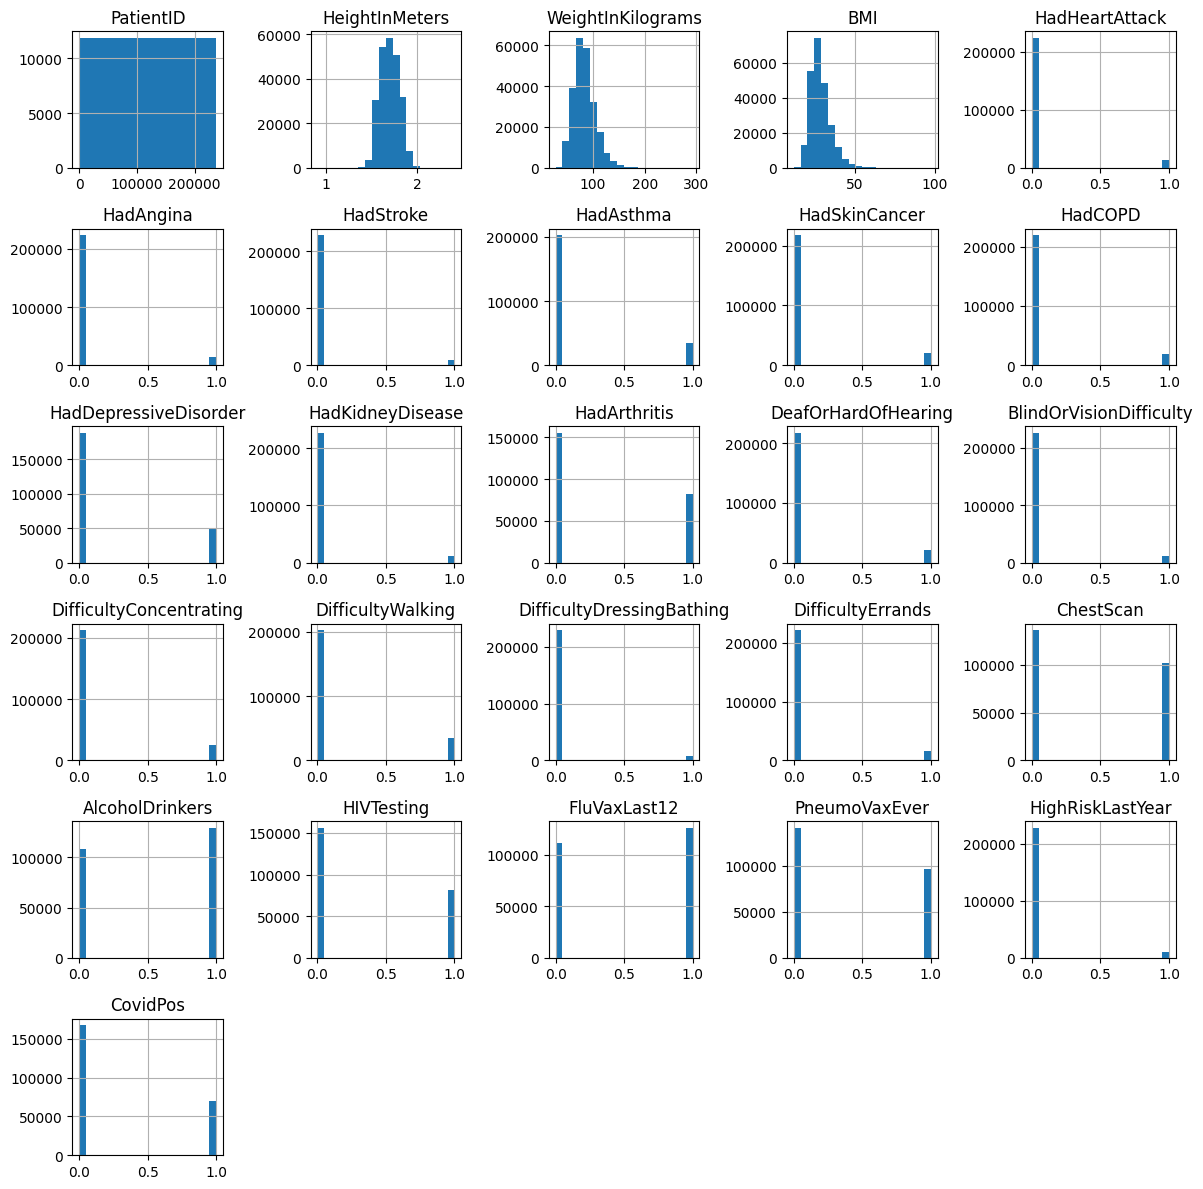

In [12]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

df[num_cols].hist(figsize=(12,12), bins=20)
plt.tight_layout()
plt.show()


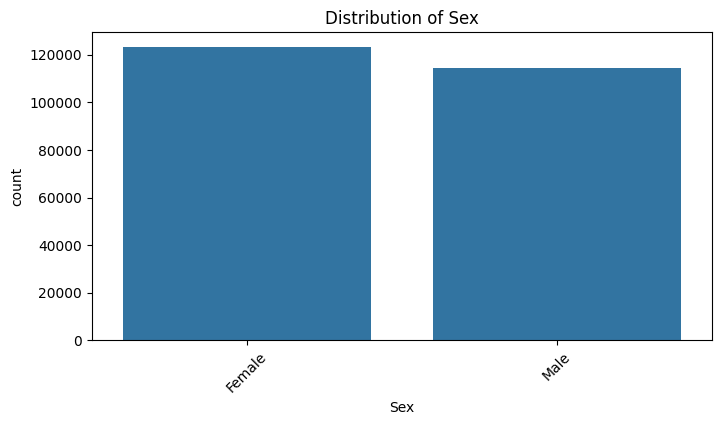

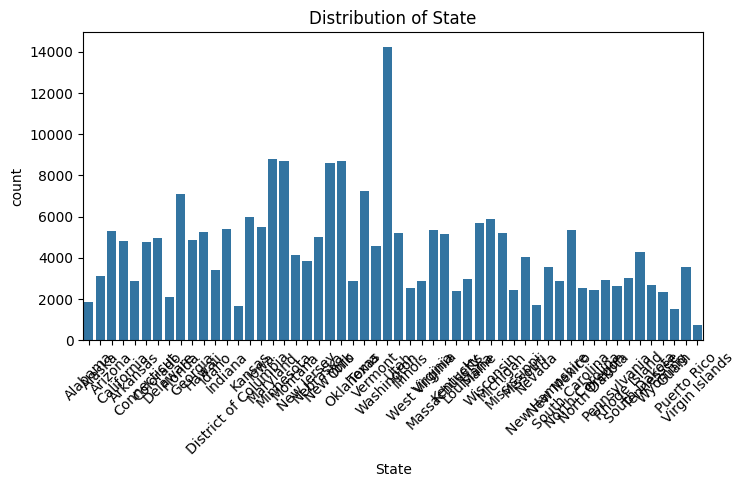

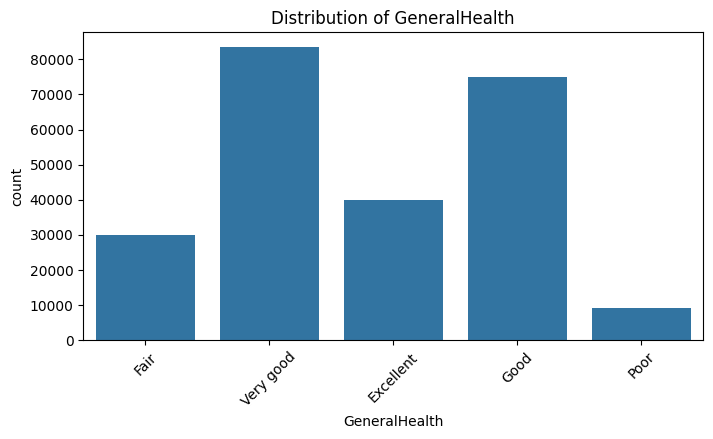

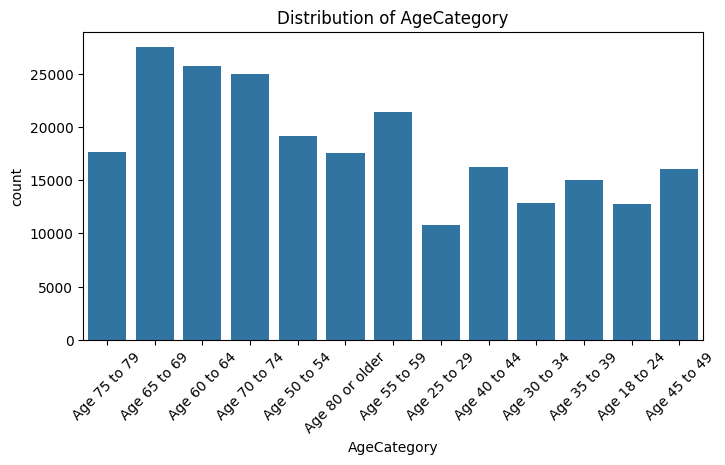

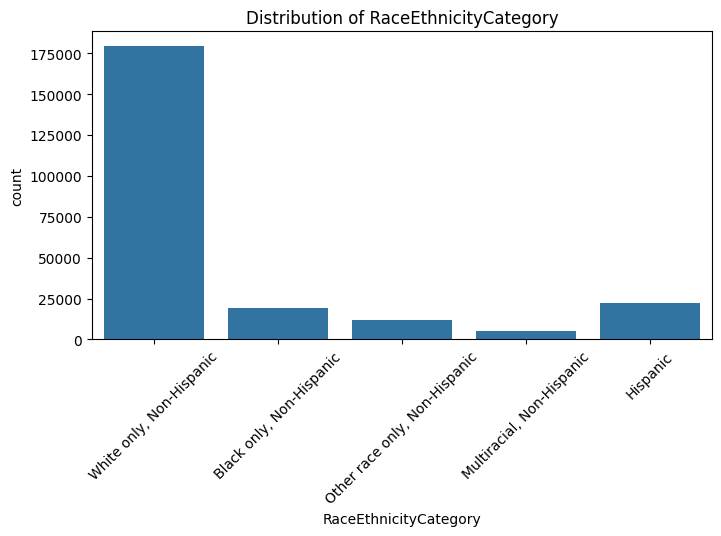

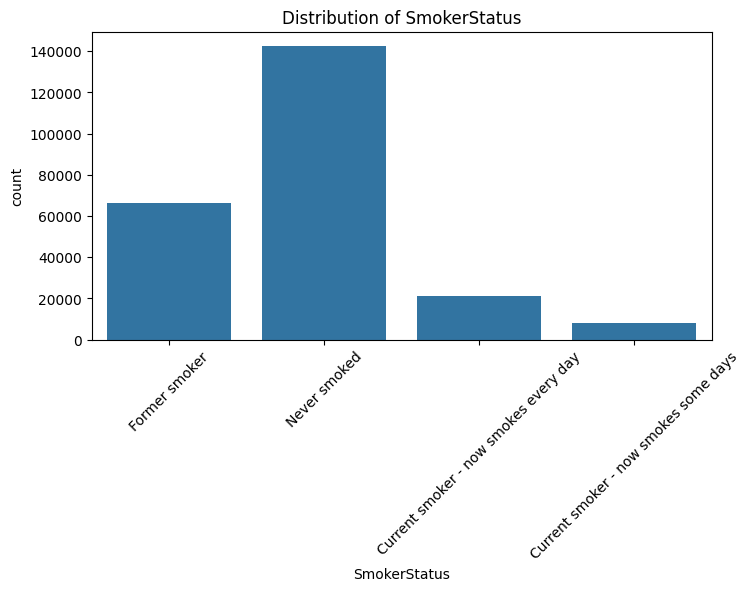

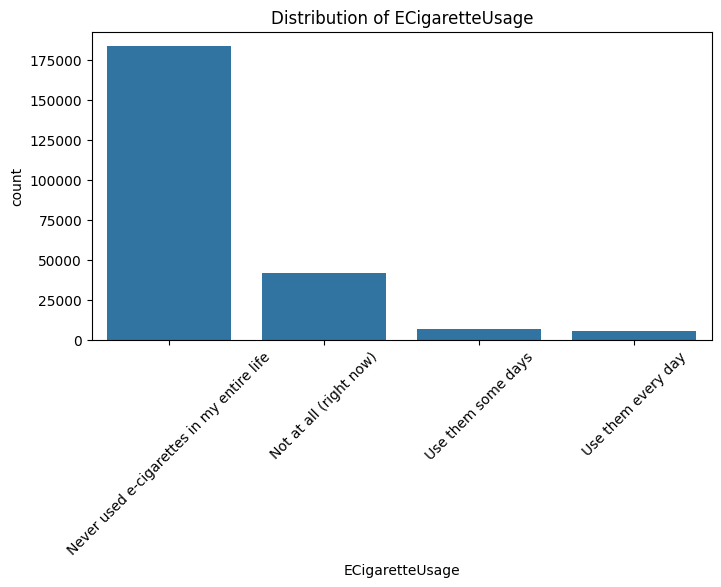

In [9]:
cat_cols = ['Sex','State','GeneralHealth','AgeCategory','RaceEthnicityCategory','SmokerStatus','ECigaretteUsage']

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()


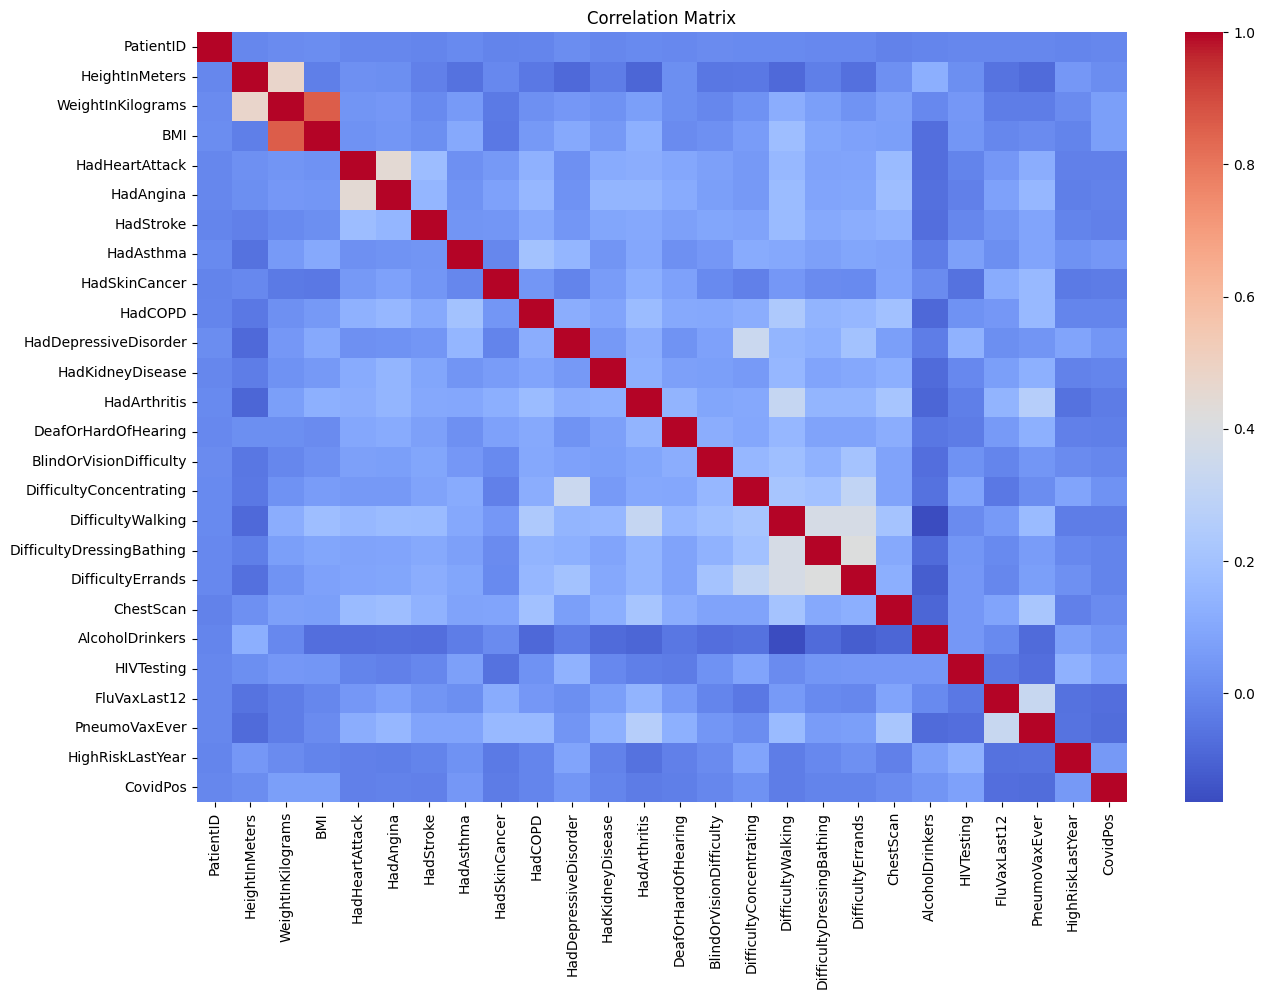

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [11]:
for col in ['RaceEthnicityCategory','GeneralHealth','AgeCategory']:
    print(col)
    print(df[col].value_counts(normalize=True).sort_values().head())
    print("\n")


RaceEthnicityCategory
RaceEthnicityCategory
Multiracial, Non-Hispanic        0.022653
Other race only, Non-Hispanic    0.049665
Black only, Non-Hispanic         0.080179
Hispanic                         0.092678
White only, Non-Hispanic         0.754825
Name: proportion, dtype: float64


GeneralHealth
GeneralHealth
Poor         0.039069
Fair         0.126099
Excellent    0.167954
Good         0.315406
Very good    0.351471
Name: proportion, dtype: float64


AgeCategory
AgeCategory
Age 25 to 29    0.045222
Age 18 to 24    0.053768
Age 30 to 34    0.053970
Age 35 to 39    0.063048
Age 45 to 49    0.067731
Name: proportion, dtype: float64




In [12]:
risk = df.groupby(['State','AgeCategory','Sex']).size().reset_index(name='count')
risk.sort_values('count').head(10)


,State,AgeCategory,Sex,count
1257,Virgin Islands,Age 40 to 44,Male,10
1251,Virgin Islands,Age 25 to 29,Male,12
1253,Virgin Islands,Age 30 to 34,Male,12
311,Guam,Age 80 or older,Male,14
1248,Virgin Islands,Age 18 to 24,Female,14
1273,Virgin Islands,Age 80 or older,Male,14
1252,Virgin Islands,Age 30 to 34,Female,15
1255,Virgin Islands,Age 35 to 39,Male,17
1254,Virgin Islands,Age 35 to 39,Female,18
1271,Virgin Islands,Age 75 to 79,Male,19


The exploratory analysis revealed significant privacy risks due to unique combinations of demographic variables (State, AgeCategory, Sex), rare medical diagnoses (stroke, heart attack, COPD), and extreme biometric values (BMI > 60, weight > 200 kg). Some categorical attribute groups showed very small representation (especially certain race/ethnicity categories), which increases re-identification likelihood. A correlation heatmap showed strong relationships among medical diagnoses and risk variables, which reinforces their role as sensitive quasi-identifiers. Together, these findings justify the need for suppression, generalization, and noise-based anonymization before training any model.